In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

appleData = pd.read_csv('apple_quality.csv') #predict if apple has good or bad quality
appleData = appleData.iloc[:1000] 
data = appleData.iloc[:, 1:appleData.shape[1]-1]
labels = appleData['Quality'].replace({'good': 1, 'bad': 0}) #encode labels

xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, random_state=42)

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def predict(start, model, data, learningRate):
    res = np.array([start] * data.shape[0])
    
    for weak in model:
        res += learningRate * weak.predict(data)
    return sigmoid(res)

def gradientBoost(xtrain, ytrain, iterations, learningRate):
    # Start with log odds
    start = np.log(len(ytrain[ytrain == 1]) / len(ytrain[ytrain == 0]))
    residuals = np.array(ytrain).flatten() - sigmoid(np.array([start] * len(ytrain)))
    
    strong = []
    trainAcc = []
    testAcc = []

    for _ in range(iterations):
        weak = DecisionTreeRegressor(max_depth=3)  # Fit weak learner to the residuals
        weak.fit(xtrain, residuals)
        pred = weak.predict(xtrain)
        # Update residuals
        residuals -= pred * learningRate
        strong.append(weak)

        # Calculate accuracy on training set
        acc = accuracy_score(np.round(predict(start, strong, xtrain, learningRate)), ytrain)
        trainAcc.append(acc)
        acc = accuracy_score(np.round(predict(start, strong, xtest, learningRate)), ytest)
        testAcc.append(acc)

    return start, strong, trainAcc, testAcc

def plotAccuracy(trainAcc, testAcc):
    plt.plot(trainAcc, label='Training Accuracy')
    plt.plot(testAcc, label='Test Accuracy')
    plt.legend()
    plt.show()

# Assuming xtrain and ytrain are defined
start, strong, trainAcc, testAcc = gradientBoost(xtrain, ytrain, 100, 0.1)

accuracy test: 0.865


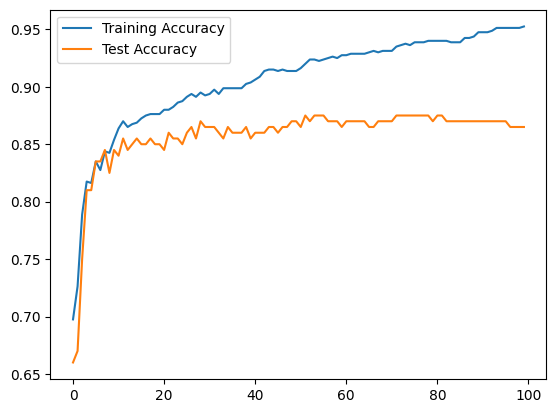

In [3]:
pred = np.round(predict(start, strong, xtest, 0.1))
acc = accuracy_score(pred, ytest)
print("accuracy test:", acc)
plotAccuracy(trainAcc, testAcc)

In [4]:
#tests results with scikit-learn library
libraryTree = GradientBoostingClassifier(max_depth=3, learning_rate=0.1)
libraryTree.fit(xtrain, np.array(ytrain).flatten())

pred = libraryTree.predict(xtest)
acc = accuracy_score(pred, ytest)
print("accuracy test:", acc)
pred = libraryTree.predict(xtrain)
acc = accuracy_score(pred, ytrain)
print("accuracy train:", acc)

accuracy test: 0.875
accuracy train: 0.95625
